In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as tcr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [77]:
data = pd.read_csv('/home/amybirdee/hobby_projects/propensity_to_buy/Propensity_data.csv', delimiter = ',', \
                       low_memory = False)

## Preliminary data checks

In [78]:
#the data consist of a user id and 0s and 1s to show whether they clicked on various items on the page and ultimately
#whether or not they placed an order
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,returning_user,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,1,0,1,1,0,0,0,1,0,1
2,7775-6b73b976-7775-4324-b1d9-622031,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4b8a-6b74bd36-4b8a-4d10-a008-67143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,7009-6b768104-7009-4526-9da6-129024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [79]:
#232,000 rows of data
data.shape

(232239, 21)

In [80]:
#don't need the id column so dropping this
data = data.drop('UserID', axis = 1)
data.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,returning_user,ordered
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232239 entries, 0 to 232238
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   basket_icon_click        232239 non-null  int64
 1   basket_add_list          232239 non-null  int64
 2   basket_add_detail        232239 non-null  int64
 3   sort_by                  232239 non-null  int64
 4   image_picker             232239 non-null  int64
 5   account_page_click       232239 non-null  int64
 6   promo_banner_click       232239 non-null  int64
 7   detail_wishlist_add      232239 non-null  int64
 8   list_size_dropdown       232239 non-null  int64
 9   closed_minibasket_click  232239 non-null  int64
 10  checked_delivery_detail  232239 non-null  int64
 11  checked_returns_detail   232239 non-null  int64
 12  sign_in                  232239 non-null  int64
 13  saw_checkout             232239 non-null  int64
 14  saw_sizecharts           232239 non-

## Exploratory data analysis

In [82]:
#checking the proportion of customers who place an order - only 8% place an order so this must be a high ticket item. Will
#assume this is an interactive exercise bike for the rest of the analysis
order = data.groupby('ordered').size().to_frame().reset_index().rename(columns = {0: 'count'})
order

,ordered,count
0,0,213146
1,1,19093


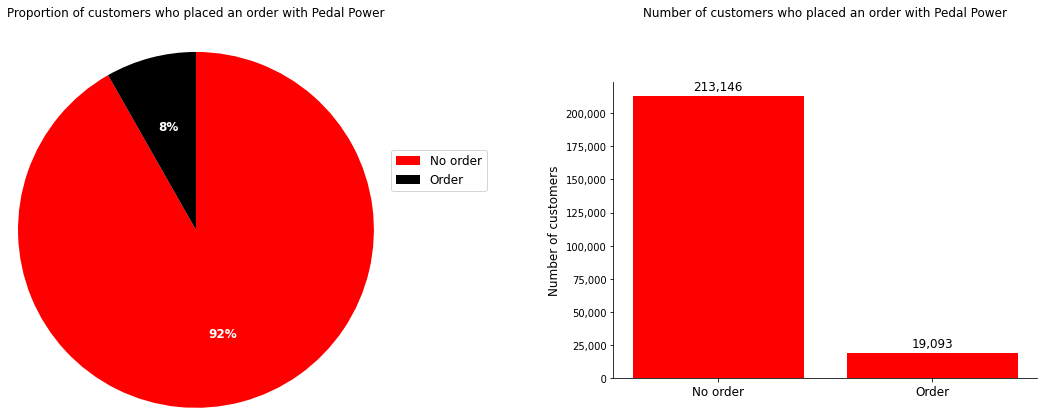

In [149]:
#creating chart
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)

_, _, autotexts = plt.pie(order['count'], colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                          counterclock = False, startangle = -270)

plt.legend(labels = ['No order', 'Order'], loc = 'right', bbox_to_anchor = (1.5, 0.7), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

plt.title('Proportion of customers who placed an order with Pedal Power', y = 1.2, fontsize = 12)

#second chart
ax = plt.subplot(1, 2, 2)

plt.bar(order['ordered'], order['count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(order['ordered'], order['count'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xticks(order['ordered'], labels = ['No order', 'Order'], fontsize = 12)   
plt.ylabel('Number of customers', fontsize = 12)
plt.title('Number of customers who placed an order with Pedal Power', y = 1.2, fontsize = 12)
plt.tight_layout()

plt.savefig('order_proportion_and_volumes')


In [84]:
#grouping by customers who added the bike to their wishlist and/or placed an order
wishlist = data.groupby(['detail_wishlist_add', 'ordered']).size().to_frame().reset_index().\
rename(columns = {0: 'count'})
wishlist

,detail_wishlist_add,ordered,count
0,0,0,211508
1,0,1,18899
2,1,0,1638
3,1,1,194


In [85]:
#filtering for users who added to wishlist only
wishlist = wishlist[wishlist['detail_wishlist_add'] == 1].reset_index(drop = True)
wishlist

,detail_wishlist_add,ordered,count
0,1,0,1638
1,1,1,194


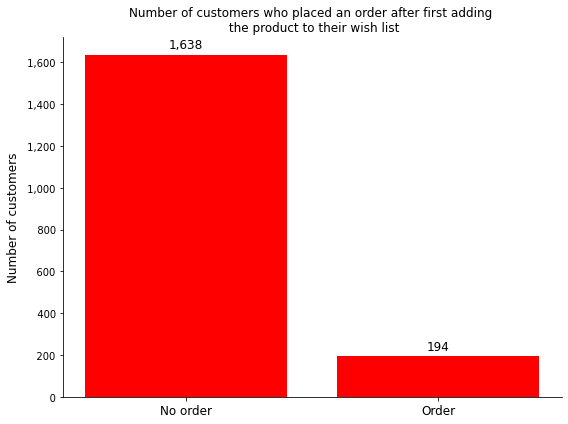

In [153]:
#creating chart
fig = plt.figure(figsize = (8, 6))
ax = plt.subplot(1, 1, 1)

plt.bar(wishlist['ordered'], wishlist['count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(wishlist['ordered'], wishlist['count'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xticks(wishlist['ordered'], labels = ['No order', 'Order'], fontsize = 12)   
plt.ylabel('Number of customers', fontsize = 12)
plt.title('Number of customers who placed an order after first adding \n the product to their wish list', y = 1.0, fontsize = 12)
plt.tight_layout()

plt.savefig('wishlist_volumes')


In [87]:
#grouping by customers who are returning customers
returning = data.groupby('returning_user').size().sort_values(ascending = False).to_frame().reset_index().\
rename(columns = {0: 'count'})
returning

,returning_user,count
0,1,155441
1,0,76798


In [88]:
#grouping by customers who are returning customers and placed an order
returning_ordered = data.groupby(['returning_user', 'ordered']).size().to_frame().reset_index().\
rename(columns = {0: 'count'})
returning_ordered

,returning_user,ordered,count
0,0,0,70663
1,0,1,6135
2,1,0,142483
3,1,1,12958


In [89]:
#filtering for returning users
returning_ordered = returning_ordered[returning_ordered['returning_user'] == 1].reset_index(drop = True)
returning_ordered

,returning_user,ordered,count
0,1,0,142483
1,1,1,12958


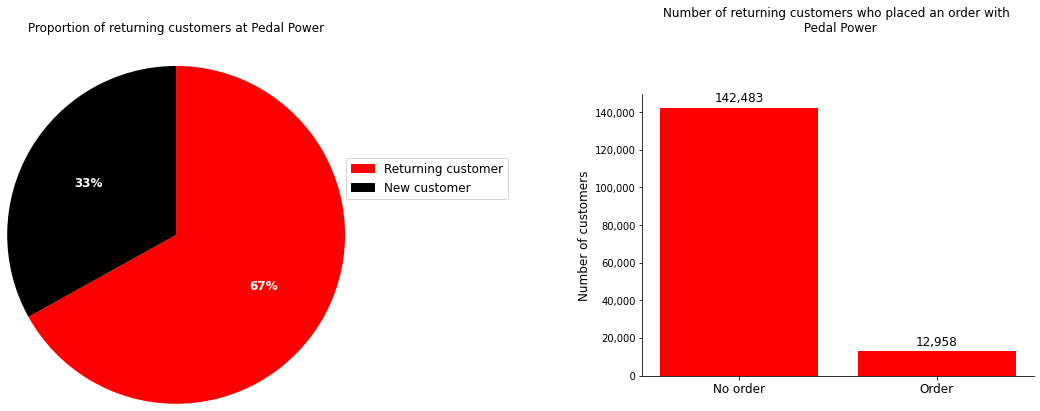

In [150]:
#creating chart
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)

_, _, autotexts = plt.pie(returning['count'], colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                          counterclock = False, startangle = -270)

plt.legend(labels = ['Returning customer', 'New customer'], loc = 'right', bbox_to_anchor = (1.7, 0.7), fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

plt.title('Proportion of returning customers at Pedal Power', y = 1.2, fontsize = 12)

#second chart
ax = plt.subplot(1, 2, 2)

plt.bar(returning_ordered['ordered'], returning_ordered['count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(returning_ordered['ordered'], returning_ordered['count'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xticks(returning_ordered['ordered'], labels = ['No order', 'Order'], fontsize = 12)   
plt.ylabel('Number of customers', fontsize = 12)
plt.title('Number of returning customers who placed an order with \n Pedal Power', y = 1.2, fontsize = 12)
plt.tight_layout()

plt.savefig('returning_proportion_and_volumes')

In [91]:
#grouping by customers who went to the checkout page
checkout = data.groupby('saw_checkout').size().sort_values(ascending = False).to_frame().reset_index().\
rename(columns = {0: 'count'})
checkout

,saw_checkout,count
0,0,191159
1,1,41080


In [92]:
#grouping by customers who saw the checkout page and placed an order
checkout_ordered = data.groupby(['saw_checkout', 'ordered']).size().to_frame().reset_index().\
rename(columns = {0: 'count'})
checkout_ordered

,saw_checkout,ordered,count
0,0,0,191159
1,1,0,21987
2,1,1,19093


In [93]:
#filtering for users who saw the checkout page
checkout_ordered = checkout_ordered[checkout_ordered['saw_checkout'] == 1].reset_index(drop = True)
checkout_ordered

,saw_checkout,ordered,count
0,1,0,21987
1,1,1,19093


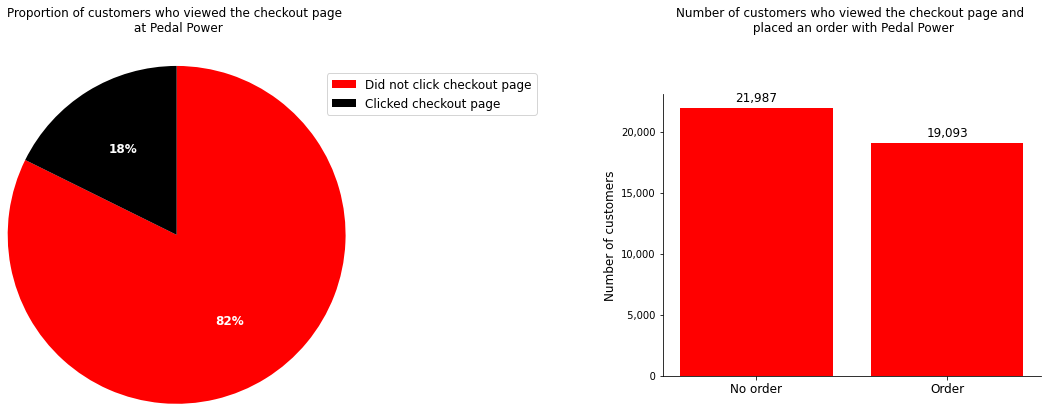

In [151]:
#creating chart
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(1, 2, 1)

_, _, autotexts = plt.pie(checkout['count'], colors = ['red', 'black'], radius = 1.5, autopct = ('%.0f%%'), \
                          counterclock = False, startangle = -270)

plt.legend(labels = ['Did not click checkout page', 'Clicked checkout page'], loc = 'right', bbox_to_anchor = (1.8, 1.0), \
           fontsize = 12)

#setting the colour of percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

plt.title('Proportion of customers who viewed the checkout page \n at Pedal Power', y = 1.2, fontsize = 12)

#second chart
ax = plt.subplot(1, 2, 2)

plt.bar(checkout_ordered['ordered'], checkout_ordered['count'], color = 'red')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding data labels for bars
bars = plt.bar(checkout_ordered['ordered'], checkout_ordered['count'], color = 'red')

for bar in bars:
    yval = bar.get_height()
    #the '{:,}' command adds a thousand separator to the labels
    ax.annotate('{:,}'.format(yval),
    xy = (bar.get_x() + bar.get_width() / 2, yval),
    #shows label position on x and y axis
    xytext = (0, 3), 
    textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
    
#function to add comma separator to labels
def comma(x, pos): 
    return format(x, "6,.0f")

#this code adds a comma separater to the y tick marks
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xticks(checkout_ordered['ordered'], labels = ['No order', 'Order'], fontsize = 12)   
plt.ylabel('Number of customers', fontsize = 12)
plt.title('Number of customers who viewed the checkout page and \n placed an order with Pedal Power',\
            y = 1.2, fontsize = 12)
plt.tight_layout()

plt.savefig('saw_checkout_proportion_and_volumes')

## Correlation analysis

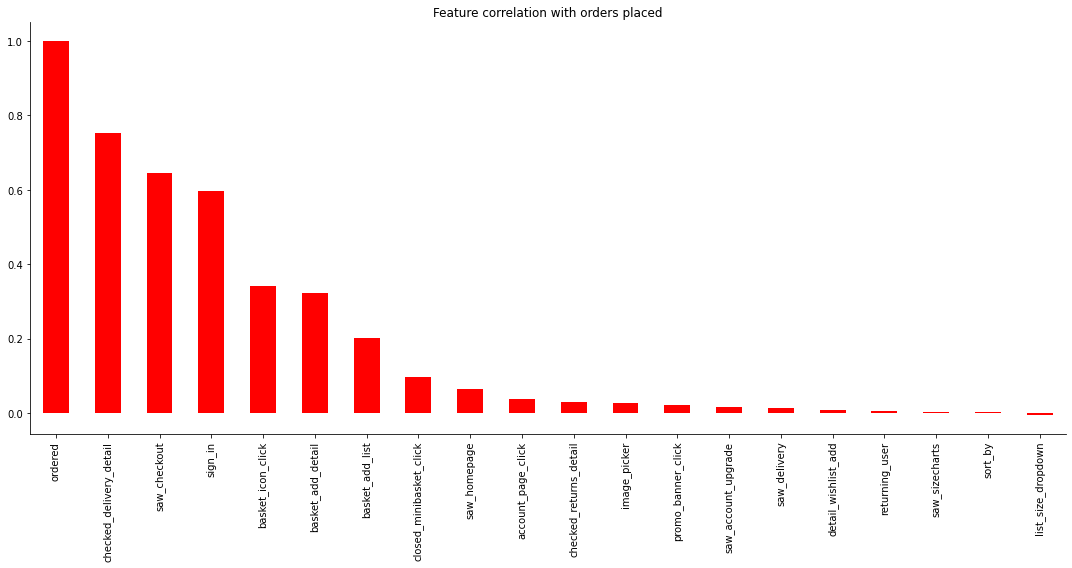

In [95]:
#plot correlations between target feature (orderded) and all other features - checking delivery and viewing the checkout\
#page is most positively correlated with orders and list dropdown is most negatively correlated
fig = plt.figure(figsize = (15, 8))
ax = plt.subplot()
data.corr()['ordered'].sort_values(ascending = False).plot(kind = 'bar', color = 'red')
plt.title('Feature correlation with orders placed', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('correlation')

In [96]:
#spltting data into dependent and independent variables
y = data.ordered.values

X = data.drop('ordered', axis = 1)

#saving the X value columns to a separate list for reassigning after scaling the data
data_columns = X.columns

In [97]:
#splitting data into training and testing datasets - we are dealing with only 0/1 numbers so no need to scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [98]:
#checking shape of training and testing sets - all records are there
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (185791, 19)
X_test shape: (46448, 19)
y_train shape: (185791,)
y_test shape: (46448,)


## Logistic regression

In [99]:
#fitting the model - using a sag solver as this is faster for large datasets which we have
logistic_model = LogisticRegression(solver = 'sag', random_state = 42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='sag')

In [100]:
#predicting the purchase values for X_train and X_test
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [101]:
#evaluating the model - finding the residual differences between train data and predicted train data
residuals = np.abs(y_train - y_pred_train)

#print value counts of predicted values
print(pd.Series(residuals).value_counts())

print('')

#print normalised value counts for predicted values - 98% of order predictions were correct on the train data set
print(pd.Series(residuals).value_counts(normalize = True))

0    182591
1      3200
dtype: int64

0    0.982776
1    0.017224
dtype: float64


In [102]:
#evaluating the model for the test data - finding the residual differences between test data and predicted test data
residuals_test = np.abs(y_test - y_pred_test)

#print value counts of predicted values
print(pd.Series(residuals_test).value_counts())

print('')

#print normalised value counts for predicted values - 98% of order predictions were correct on the test data set
print(pd.Series(residuals_test).value_counts(normalize = True))

0    45705
1      743
dtype: int64

0    0.984004
1    0.015996
dtype: float64


In [103]:
#definitions
#precision - how precise the predictions are or TP / (TP + FP). (Out of the times the model said the customer would order, 
#how many times did they actually order)

#recall - what percentage of the class we're interested in were captured by the model or TP / (TP + FN). (Out of all the 
#customers that ordered, what percentage did the model predict as 'going to order')

#accuracy - measures what percentage of predictions the model got right or (TP + TN) / (TP + FP + TN + FN). 

#F1 score - harmonic mean of precision and recall - can't have a high F1 score without a strong model underneath. 
#F1 = 2(precision * recall) / (precision + recall)
#F1 score penalises model heavily if it's skewed towards precison or recall

In [104]:
#printing the confusion matrix - we are trying to limit false positives (i.e. when we predict a customer will place an order
#but they don't). When trying to limit false positives we want to optimise on precision rather than recall

#41957 = true negative, 3748 = true positive, 56 = false negative, 687 = false positive
matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix \n', matrix)

Confusion matrix 
 [[41957   687]
 [   56  3748]]


In [105]:
#visualising the confusion matrix with labels
y_test_df = pd.Series(y_test)
y_pred_test_df = pd.Series(y_pred_test)

pd.crosstab(y_test_df, y_pred_test_df, rownames = ['True'], colnames = ['Predicted'], margins = True).reset_index()

Predicted,True,0,1,All
0,0,41957,687,42644
1,1,56,3748,3804
2,All,42013,4435,46448


In [106]:
#concatenating the series into a dataframe and adding a new row to describe what the result is in each. The function uses
#if statements to define the result

results = pd.concat([y_test_df, y_pred_test_df], axis = 1).rename(columns = {0: 'actual', 1: 'prediction'})

def regression_results(row):
    if row['actual'] == 1 and row['prediction'] == 1:
        return 'actual = ordered and prediction = ordered - True positive'
    if row['actual'] == 0 and row['prediction'] == 0:
        return 'actual = did not order and prediction =  did not order - True negative'
    if row['actual'] == 0 and row['prediction'] == 1:
        return 'actual = did not order but prediction = ordered - False positive'
    if row['actual'] == 1 and row['prediction'] == 0:
        return 'actual = ordered but prediction = did not order - False negative'

#applying the above function to a new row    
results['result'] = results.apply(lambda row: regression_results(row), axis = 1)
print(results.head())

   actual  prediction                                             result
0       0           0  actual = did not order and prediction =  did n...
1       0           0  actual = did not order and prediction =  did n...
2       0           0  actual = did not order and prediction =  did n...
3       0           0  actual = did not order and prediction =  did n...
4       0           0  actual = did not order and prediction =  did n...


In [107]:
#grouping the results to compare with the confustion matrix
results_grouped = results.groupby('result').size()
results_grouped

result
actual = did not order and prediction =  did not order - True negative    41957
actual = did not order but prediction = ordered - False positive            687
actual = ordered and prediction = ordered - True positive                  3748
actual = ordered but prediction = did not order - False negative             56
dtype: int64

In [108]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and y_pred_test
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42644
           1       0.85      0.99      0.91      3804

    accuracy                           0.98     46448
   macro avg       0.92      0.98      0.95     46448
weighted avg       0.99      0.98      0.98     46448



In [109]:
#another way to print the scores, pos_label tells sklearn what class you want to print - we want 1 as that's the 'will 
#order' class

precision_train = precision_score(y_train, y_pred_train, pos_label = 1)
precision_test = precision_score(y_test, y_pred_test, pos_label = 1)

recall_train = recall_score(y_train, y_pred_train, pos_label = 1)
recall_test = recall_score(y_test, y_pred_test, pos_label = 1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, pos_label = 1)
f1_test = f1_score(y_test, y_pred_test, pos_label = 1)

print('Precision train: ', round(precision_train, 2))
print('Precision test: ', round(precision_test, 2))
print('')
print('Recall train: ', round(recall_train, 2))
print('Recall test: ', round(recall_test, 2))
print('')
print('Accuracy train: ', round(accuracy_train, 2))
print('Accuracy test: ', round(accuracy_test, 2))
print('')
print('F1 train: ', round(f1_train, 2))
print('F1 test: ', round(f1_test, 2))
print('')

Precision train:  0.84
Precision test:  0.85

Recall train:  0.98
Recall test:  0.99

Accuracy train:  0.98
Accuracy test:  0.98

F1 train:  0.9
F1 test:  0.91



In [110]:
#calculating probabilities scores for test and train sets
prob_train = logistic_model.predict_proba(X_train)
prob_test = logistic_model.predict_proba(X_test)

#keeping probabilities for positive outcome only (the threshold is 0.5 which means, if the predicted probability of the 
#class for an instance is less than 0.5, that instance is predicted to be in class 0 (the negative class). If the 
#probability of the class for an instance is equal or greater than 0.5, the instance is classified as class 1.)
prob_train_order = prob_train[:, 1]
prob_test_order = prob_test[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for train set
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob_train_order)

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, prob_test_order)

In [111]:
#calculating AUC (Area Under Curve) - this gives a single numeric metric to evaluate the model. An AUC value of 1 would 
#represent a perfect classifier. If AUC = 0.5 the classifier only has 50% preision. AUC scores above 0.99 so pretty good.

auc_train = auc(train_fpr, train_tpr)
auc_test = auc(test_fpr, test_tpr)
print('Training AUC: ', round(auc_train, 5))
print('Testing AUC: ', round(auc_test, 5))

Training AUC:  0.99289
Testing AUC:  0.99328


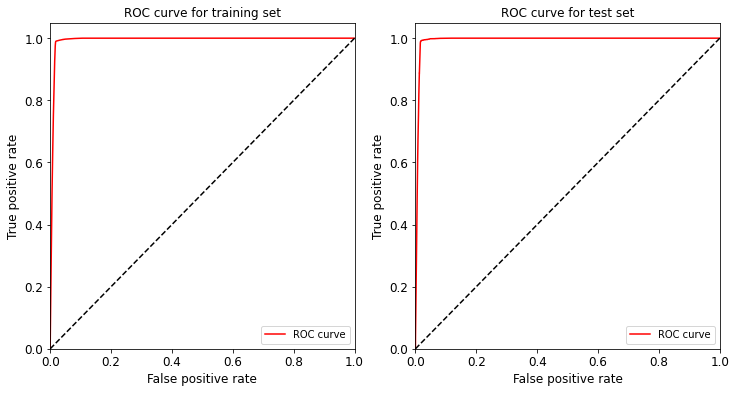

In [112]:
#plotting an ROC (Receiver Operator Characteristic) curve to evaluate the model performance visually. It illustrates the
#true positive rate against the false positive rate of our classifier. Best performing models will have an ROC curve that 
#hugs the upper left corner of the graph. This would represent that we correctly classify the positives much more often 
#than we incorrectly classify them. 

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(1, 2, 1)
plt.plot(train_fpr, train_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for training set', fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for test set', fontsize = 12)
plt.savefig('ROC_curves')

In [113]:
#the ROC curve shows a near perfect classifier. Looking at the data to double check this is correct - it is - these figures
#match the confusion matrix
print('counts for test set:')
print(pd.Series(y_test).value_counts())
print('')
print('counts for predictions on test set:')
print(pd.Series(y_pred_test).value_counts())

counts for test set:
0    42644
1     3804
dtype: int64

counts for predictions on test set:
0    42013
1     4435
dtype: int64


## Random Forest

In [114]:
#first runningthe data through a random forest model with default hyperparameters
default_forest = RandomForestClassifier(random_state = 42)
default_model = default_forest.fit(X_train, y_train)
default_y_pred = default_model.predict(X_test)

In [115]:
#printing the confusion matrix - 669 false postives versus 687 with the logistic regression so random forest performed
#better in reducing false positives

#41975 = true negative, 3703 = true positive, 101 = false negative, 669 = false positive
matrix = confusion_matrix(y_test, default_y_pred)
print('Confusion matrix \n', matrix)

Confusion matrix 
 [[41975   669]
 [  101  3703]]


In [116]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and default_y_pred - accuracy and precision
#are same as logistic regression
print(metrics.classification_report(y_test, default_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42644
           1       0.85      0.97      0.91      3804

    accuracy                           0.98     46448
   macro avg       0.92      0.98      0.95     46448
weighted avg       0.99      0.98      0.98     46448



In [117]:
#will tune some of the hyperparameters of the random forest model to see if scores can be improved. will tune number of 
#estimators, max depth, min sample split and min sample leaf. Starting with n_estimators - this shows the number of trees in
#the forest. Default value is 10

num_est = [50, 100, 250, 500, 750]

#preparing to create a validation curve - this is a tool that shows how accuracy changes with changes in the model 
#parameters.
#cv = cross validation - it's used to test the effectiveness of machine learning models and is a resampling procedure
train_score_num_est, test_score_num_est = validation_curve(
                                            RandomForestClassifier(),
                                            X = X_train, y = y_train,
                                            param_name = 'n_estimators',
                                            param_range = num_est,
                                            cv = 5,
                                            scoring = 'accuracy')

In [118]:
#to plot the validation curve, we need the mean of the 5 cross validation scores - calculating mean and standard deviation
#for train and test sets

mean_train_score_num_est = np.mean(train_score_num_est, axis = 1)
std_train_score_num_est = np.std(train_score_num_est, axis = 1)

mean_test_score_num_est = np.mean(test_score_num_est, axis = 1)
std_test_score_num_est = np.std(test_score_num_est, axis = 1)

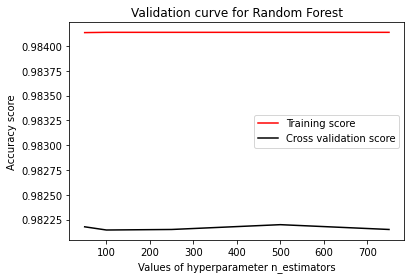

In [119]:
#plotting the validation curve - large difference between training scores and cross validation scores but the training set
#still had an average accuracy of 98% for each of the three cross validations. The two lines are ever so slightly closer
#at 50 estimaters so will use this in tuned model

plt.plot(num_est, mean_train_score_num_est, label = 'Training score', color = 'red')
plt.plot(num_est, mean_test_score_num_est, label = 'Cross validation score', color = 'black')

plt.title('Validation curve for Random Forest')
plt.xlabel('Values of hyperparameter n_estimators')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [120]:
#tuning max_depth which specifies the maximum depth of each tree. The default is none which means that each tree will
#expand until each leaf is pure, i.e. where all the data on the leaf comes from the same class

depth = [1, 5, 10, 20, 30]

#preparing to create the cross validation curve

train_score_depth, test_score_depth = validation_curve(
                                            RandomForestClassifier(),
                                            X = X_train, y = y_train,
                                            param_name = 'max_depth',
                                            param_range = depth,
                                            cv = 5,
                                            scoring = 'accuracy')

In [121]:
#calculating mean and standard deviation for train and test sets

mean_train_score_depth = np.mean(train_score_depth, axis = 1)
std_train_score_depth = np.std(train_score_depth, axis = 1)

mean_test_score_depth = np.mean(test_score_depth, axis = 1)
std_test_score_depth = np.std(test_score_depth, axis = 1)

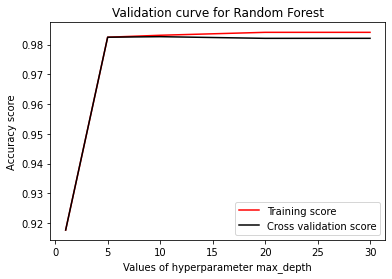

In [122]:
#both the training and cross validations scores are highst at a tree depth of 5 so this will be used in the final model

plt.plot(depth, mean_train_score_depth, label = 'Training score', color = 'red')
plt.plot(depth, mean_test_score_depth, label = 'Cross validation score', color = 'black')

plt.title('Validation curve for Random Forest')
plt.xlabel('Values of hyperparameter max_depth')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [123]:
#tuning min_samples_split which is the minimum number of samples reqired to split an internal leaf node. 
#The default value is 2 which means that each internal leaf node must have at least two sampls before it can split into a 
#more specific classification

sample_split = [5, 10, 15, 20, 25]

#preparing to create the cross validation curve

train_score_split, test_score_split = validation_curve(
                                            RandomForestClassifier(),
                                            X = X_train, y = y_train,
                                            param_name = 'min_samples_split',
                                            param_range = sample_split,
                                            cv = 5,
                                            scoring = 'accuracy')

In [124]:
#calculating mean and standard deviation for train and test sets

mean_train_score_split = np.mean(train_score_split, axis = 1)
std_train_score_split = np.std(train_score_split, axis = 1)

mean_test_score_split = np.mean(test_score_split, axis = 1)
std_test_score_split = np.std(test_score_split, axis = 1)

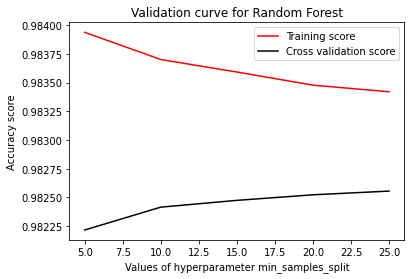

In [125]:
#cross validation score is highest at 10 samples and then starts to flatten out. At this point accuracy is falling but it's
#still high at 98.3%. Will therefore go with 10 samples before a leaf node can split - this should be ok given that we 
#have over 100,000 samples in the training set

plt.plot(sample_split, mean_train_score_split, label = 'Training score', color = 'red')
plt.plot(sample_split, mean_test_score_split, label = 'Cross validation score', color = 'black')

plt.title('Validation curve for Random Forest')
plt.xlabel('Values of hyperparameter min_samples_split')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [126]:
#tuning min_samples_leaf which is the minimum number of samples required to be a leaf node. The default is 1 which means
#that every leaf must have at least one sample that it classifies

sample_leaf = [2, 4, 6, 8, 10]

#preparing to create the cross validation curve

train_score_leaf, test_score_leaf = validation_curve(
                                            RandomForestClassifier(),
                                            X = X_train, y = y_train,
                                            param_name = 'min_samples_leaf',
                                            param_range = sample_leaf,
                                            cv = 5,
                                            scoring = 'accuracy')

In [127]:
#calculating mean and standard deviation for train and test sets

mean_train_score_leaf = np.mean(train_score_leaf, axis = 1)
std_train_score_leaf = np.std(train_score_leaf, axis = 1)

mean_test_score_leaf = np.mean(test_score_leaf, axis = 1)
std_test_score_leaf = np.std(test_score_leaf, axis = 1)

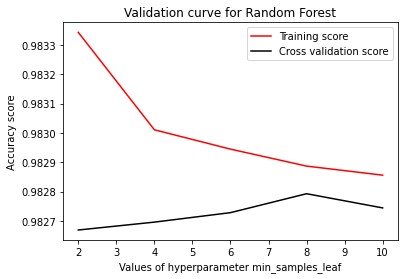

In [128]:
#cross validation score is highest at 6 samples. At this point accuracy is falling but it's still high at 98.3%. Will
#therefore go with 8 samples as the minumum for each leaf node to classify 

plt.plot(sample_leaf, mean_train_score_leaf, label = 'Training score', color = 'red')
plt.plot(sample_leaf, mean_test_score_leaf, label = 'Cross validation score', color = 'black')

plt.title('Validation curve for Random Forest')
plt.xlabel('Values of hyperparameter min_samples_leaf')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [139]:
#now putting our new hyperparameters into the final model

tuned_forest = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_split = 10, min_samples_leaf = 8,
                                       random_state = 42)

tuned_model = tuned_forest.fit(X_train, y_train)

tuned_y_pred = tuned_model.predict(X_test)

In [140]:
#printing the confusion matrix - 711 false positives versus 669 in default forest

#41933 = true negative, 3752 = true positive, 52 = false negative, 711 = false positive
matrix = confusion_matrix(y_test, tuned_y_pred)
print('Confusion matrix \n', matrix)

Confusion matrix 
 [[41933   711]
 [   52  3752]]


In [141]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and default_y_pred - accuracy and precision
#are same as logistic regression and default random forest when printed to 2 dp
print(metrics.classification_report(y_test, tuned_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42644
           1       0.84      0.99      0.91      3804

    accuracy                           0.98     46448
   macro avg       0.92      0.98      0.95     46448
weighted avg       0.99      0.98      0.98     46448



In [142]:
#printing all scores for all models for class 1 on the test sets. Default model has a higher precision score than the tuned
#model and logistic regression model also had a higher precision score then tuned model. Logistic regression model also has
#a higher accuracy and F1 score than both random forest models although differences are small

#precision
log_reg_precision = precision_score(y_test, y_pred_test, pos_label = 1)
default_forest_precision = precision_score(y_test, default_y_pred, pos_label = 1)
tuned_forest_precision = precision_score(y_test, tuned_y_pred, pos_label = 1)

#recall
log_reg_recall = recall_score(y_test, y_pred_test, pos_label = 1)
default_forest_recall = recall_score(y_test, default_y_pred, pos_label = 1)
tuned_forest_recall = recall_score(y_test, tuned_y_pred, pos_label = 1)

#accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_test)
default_forest_accuracy = accuracy_score(y_test, default_y_pred)
tuned_forest_accuracy = accuracy_score(y_test, tuned_y_pred)

#f1 score
log_reg_f1 = f1_score(y_test, y_pred_test, pos_label = 1)
default_forest_f1 = f1_score(y_test, default_y_pred, pos_label = 1)
tuned_forest_f1 = f1_score(y_test, tuned_y_pred, pos_label = 1)

print('Logistic regression precision: ', round(log_reg_precision, 5))
print('Default Random Forest precision: ', round(default_forest_precision, 5))
print('Tuned Random Forest precision: ', round(tuned_forest_precision, 5))
print('')
print('Logistic regression recall: ', round(log_reg_recall, 5))
print('Default Random Forest recall: ', round(default_forest_recall, 5))
print('Tuned Random Forest recall: ', round(tuned_forest_recall, 5))
print('')
print('Logistic regression accuracy: ', round(log_reg_accuracy, 5))
print('Default Random Forest accuracy: ', round(default_forest_accuracy, 5))
print('Tuned Random Forest accuracy: ', round(tuned_forest_accuracy, 5))
print('')
print('Logistic regression F1: ', round(log_reg_f1, 5))
print('Default Random Forest F1: ', round(default_forest_f1, 5))
print('Tuned Random Forest F1: ', round(tuned_forest_f1, 5))

Logistic regression precision:  0.8451
Default Random Forest precision:  0.84698
Tuned Random Forest precision:  0.84069

Logistic regression recall:  0.98528
Default Random Forest recall:  0.97345
Tuned Random Forest recall:  0.98633

Logistic regression accuracy:  0.984
Default Random Forest accuracy:  0.98342
Tuned Random Forest accuracy:  0.98357

Logistic regression F1:  0.90982
Default Random Forest F1:  0.90582
Tuned Random Forest F1:  0.90771


In [143]:
#calculating probabilities scores for test sets
default_prob = default_model.predict_proba(X_test)
tuned_prob = tuned_model.predict_proba(X_test)

#keeping probabilities for positive outcome only (the threshold is 0.5 which means, if the predicted probability of the 
#class for an instance is less than 0.5, that instance is predicted to be in class 0 (the negative class). If the 
#probability of the class for an instance is equal or greater than 0.5, the instance is classified as class 1.)
default_prob_order = default_prob[:, 1]
tuned_prob_order = tuned_prob[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for test set
test_fpr_d, test_tpr_d, test_thresholds_d = roc_curve(y_test, default_prob_order)
test_fpr_t, test_tpr_t, test_thresholds_t = roc_curve(y_test, tuned_prob_order)

In [144]:
#calculating AUC (Area Under Curve) - AUC is higher for the tuned model. But logistic regression model is still higher than
#both (0.99328)

default_auc = auc(test_fpr_d, test_tpr_d)
tuned_auc = auc(test_fpr_t, test_tpr_t)
print('Default AUC: ', round(default_auc, 5))
print('Tuned_AUC: ', round(tuned_auc, 5))

Default AUC:  0.99187
Tuned_AUC:  0.9926


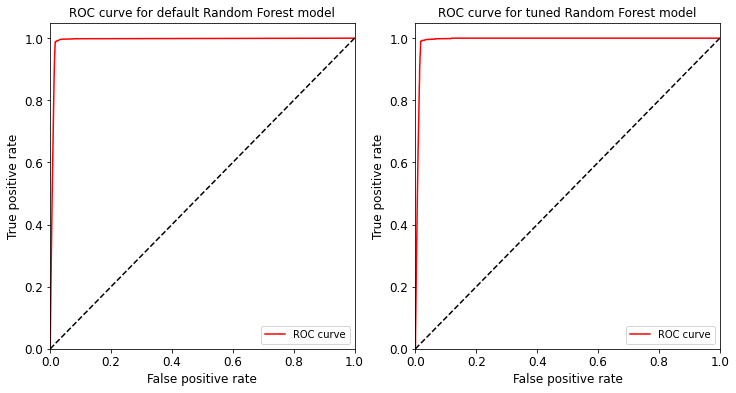

In [145]:
#plotting an ROC curves for random forest models - again they show a very good model, similar to the logistic regression

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(1, 2, 1)
plt.plot(test_fpr_d, test_tpr_d, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for default Random Forest model', fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.plot(test_fpr_t, test_tpr_t, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for tuned Random Forest model', fontsize = 12)
plt.savefig('RF_ROC_curves')

In [146]:
#checking feature importance in default model
feature_importance = pd.Series(default_model.feature_importances_, index = X.columns)
feature_importance.sort_values(ascending = False, inplace = True)
print(feature_importance)

checked_delivery_detail    0.486037
saw_checkout               0.218194
sign_in                    0.152668
basket_add_detail          0.044707
basket_icon_click          0.042424
basket_add_list            0.012417
saw_delivery               0.007964
saw_homepage               0.006766
list_size_dropdown         0.005295
checked_returns_detail     0.005062
returning_user             0.004297
closed_minibasket_click    0.003183
image_picker               0.002450
promo_banner_click         0.002180
sort_by                    0.002065
detail_wishlist_add        0.001568
account_page_click         0.001540
saw_account_upgrade        0.000899
saw_sizecharts             0.000284
dtype: float64


In [147]:
#checking feature importance in tuned model
feature_importance_t = pd.Series(tuned_model.feature_importances_, index = X.columns)
feature_importance_t.sort_values(ascending = False, inplace = True)
print(feature_importance_t)

checked_delivery_detail    0.410433
saw_checkout               0.250969
sign_in                    0.200023
basket_add_detail          0.059542
basket_icon_click          0.044216
basket_add_list            0.013162
saw_homepage               0.006571
list_size_dropdown         0.004283
saw_delivery               0.003197
checked_returns_detail     0.002900
returning_user             0.001676
image_picker               0.001168
closed_minibasket_click    0.000848
detail_wishlist_add        0.000462
account_page_click         0.000291
sort_by                    0.000162
promo_banner_click         0.000044
saw_account_upgrade        0.000037
saw_sizecharts             0.000016
dtype: float64


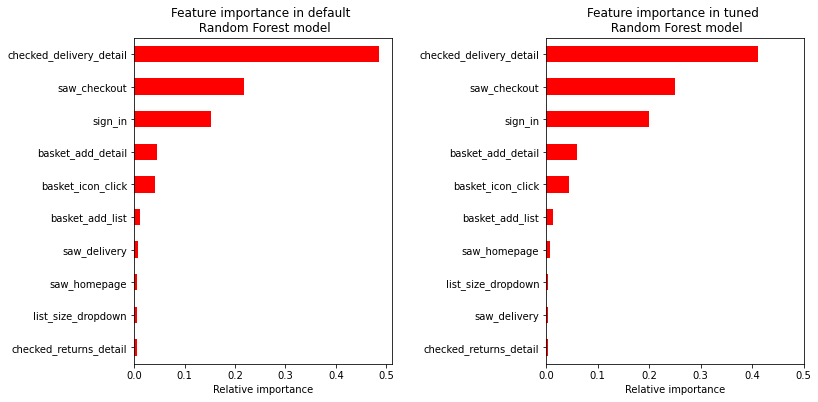

In [148]:
#plotting feature importance for default model
plt.figure(figsize = (12,6))
ax = plt.subplot(1, 2, 1)

feature_importance.nlargest(10).plot(kind = 'barh', color = 'red').invert_yaxis()
plt.xlabel('Relative importance')
plt.title('Feature importance in default \n Random Forest model', fontsize = 12)

ax = plt.subplot(1, 2, 2)

feature_importance_t.nlargest(10).plot(kind = 'barh', color = 'red').invert_yaxis()
plt.xlabel('Relative importance')
ax.set_xlim(0.0, 0.5)
plt.title('Feature importance in tuned \n Random Forest model', fontsize = 12)

plt.subplots_adjust(wspace = 0.6)
plt.savefig('feature_importance')
plt.show()